In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix

In [3]:
data = pd.read_csv("data/housing.csv", sep=";")

Aufgabe 1:
Teil 1:
- Mehrdimensionale Lineare Regression auf einem Datensatz (https://github.com/ageron/handson-ml/blob/master/datasets/housing/)
- Vorverarbeitung der Daten (Skalierung, kategorische Attribute: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Aufteilung in Test & Train
- Berechnung der Fehler der Vorhersage auf dem Test-Datensatz
- Anpassung der Inputdaten (Feature Engineering)
- Niedrigster MSE auf einem (für alle der gleiche) Test-Datensatz gewinnt
Teil 2
So wie Teil 1 nur mit kNeighborsRegression als Vorhersageverfahren

# Looking at the data

In [4]:
print(data.isnull().sum().sum()) #nr of nans
#data.isnull().values.any() # only gives true/false
print(data.shape)

207
(20640, 10)


In [5]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [6]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Preprocessing

### Encoding categorical features

In [7]:
enc_labels = preprocessing.LabelEncoder()
enc_ohe = preprocessing.OneHotEncoder(sparse=False) #easier to read

In [9]:
enc_labels.fit(data["ocean_proximity"])
new_ocean_prox = enc_labels.transform(data["ocean_proximity"])
print(new_ocean_prox)
new_ocean_arr = enc_ohe.fit_transform(new_ocean_prox.reshape(-1, 1))
new_ocean_df = pd.DataFrame(data = new_ocean_arr, columns = list(enc_labels.classes_))

[3 3 3 ... 1 1 1]


In [10]:
data_new = pd.concat([data,new_ocean_df],axis=1)
display(data_new)
data_new.drop("ocean_proximity",axis = 1,inplace = True)
data_new

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                  28         2130           484.0   
20611    -121.55     39.10                  27         1783           441.0   
20612    -121.56     39.08                  26         1377           289.0   
20613    -121.55     39.09                  31         1728           365.0   
20614    -121.54     39.08                  26         2276           460.0   
20615    -121.54     39.08                  23         1076           216.0   
20616    -121.53     39.08                  15         1810           441.0   
20617    -121.53     39.06                  20          561           109.0   
20618    -121.55     39.06                  25         1332           247.0   
20619    -121.56     39.01                  22         1891           340.0   
20620    -121.48     39.05                  40          198            41.0   
20621    -121.47     39.01                  37         1244           247.0   
20622    -121.44     39.00                  20          755           147.0   
20623    -121.37     39.03                  32         1158           244.0   
20624    -121.41     39.04                  16         1698           300.0   
20625    -121.52     39.12                  37          102            17.0   
20626    -121.43     39.18                  36         1124           184.0   
20627    -121.32     39.13                   5          358            65.0   
20628    -121.48     39.10                  19         20

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                  28         2130           484.0   
20611    -121.55     39.10                  27         1783           441.0   
20612    -121.56     39.08                  26         1377           289.0   
20613    -121.55     39.09                  31         1728           365.0   
20614    -121.54     39.08                  26         2276           460.0   
20615    -121.54     39.08                  23         1076           216.0   
20616    -121.53     39.08                  15         1810           441.0   
20617    -121.53     39.06                  20          561           109.0   
20618    -121.55     39.06                  25         1332           247.0   
20619    -121.56     39.01                  22         1891           340.0   
20620    -121.48     39.05                  40          198            41.0   
20621    -121.47     39.01                  37         1244           247.0   
20622    -121.44     39.00                  20          755           147.0   
20623    -121.37     39.03                  32         1158           244.0   
20624    -121.41     39.04                  16         1698           300.0   
20625    -121.52     39.12                  37          102            17.0   
20626    -121.43     39.18                  36         1124           184.0   
20627    -121.32     39.13                   5          358            65.0   
20628    -121.48     39.10                  19         20

### Replacing NaNs

In [11]:
# replacing the 207 NaNs in column total_bedroom by mean of the column

In [12]:
#imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit([data_new["total_bedrooms"]])
#print(data_new["total_bedrooms"].shape)
#test = imp.transform([data_new["total_bedrooms"]])
#with pd.option_context('display.max_rows', 30, 'display.max_columns', 250): # shows the whole df 
#    display(pd.DataFrame(test))
data_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new["total_bedrooms"])   

0         129.000000
1        1106.000000
2         190.000000
3         235.000000
4         280.000000
5         213.000000
6         489.000000
7         687.000000
8         665.000000
9         707.000000
10        434.000000
11        752.000000
12        474.000000
13        191.000000
14        626.000000
15        283.000000
16        347.000000
17        293.000000
18        455.000000
19        298.000000
20        184.000000
21        367.000000
22        541.000000
23        337.000000
24        437.000000
25        123.000000
26        244.000000
27        421.000000
28        492.000000
29        160.000000
30        447.000000
31        481.000000
32        409.000000
33        366.000000
34        574.000000
35        282.000000
36        432.000000
37        390.000000
38        330.000000
39        715.000000
40        419.000000
41        311.000000
42        202.000000
43        202.000000
44        311.000000
45        420.000000
46        322.000000
47        312

### Scaling to mean 0 and unit variance

In [13]:
data_new.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0         322         126         8.3252              452600        0.0   
1        2401        1138         8.3014              358500        0.0   
2         496         177         7.2574              352100        0.0   
3         558         219         5.6431              341300        0.0   
4         565         259         3.8462              342200        0.0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0     0.0     0.0       1.0         0.0  
1     0.0     0.0       1.0         0.0  
2     0.0     0.0       1.0         0.0  
3     0.0     0.0       1.0         0.0  
4     0.0     0.0       1.0         0.0

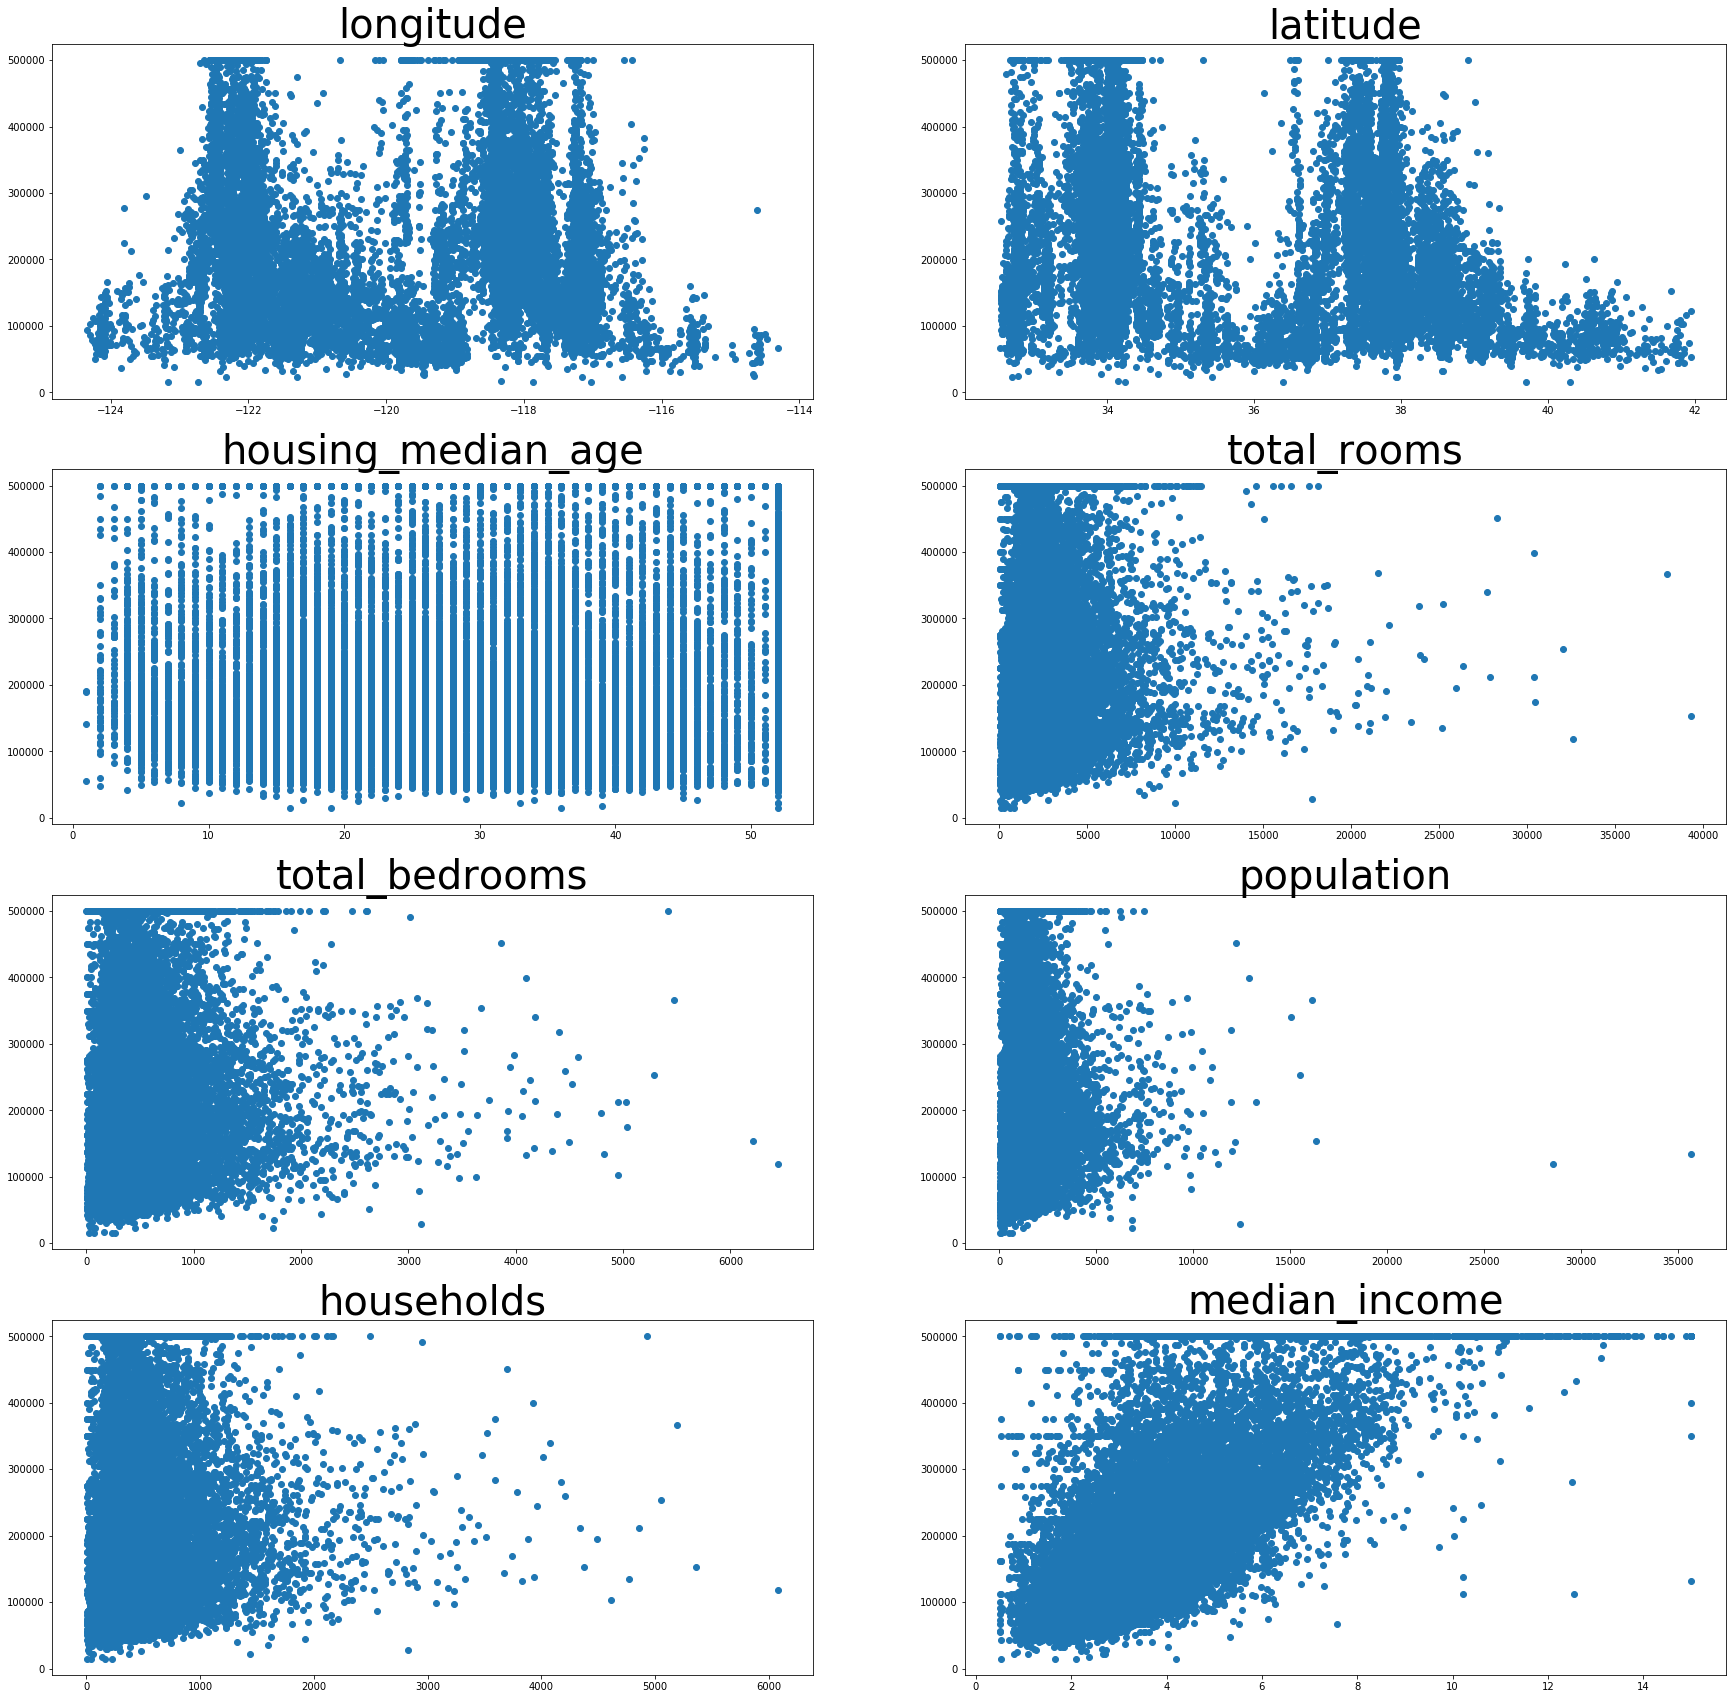

In [22]:
fig = plt.figure(figsize = (30,30))
for col in range(0,8):
    plt.subplot(4,2,col+1)
    plt.scatter(data_new.iloc[:,col],data_new["median_house_value"])
    plt.title(data_new.columns[col],fontsize=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E33CEF0>,
      dtype=object)

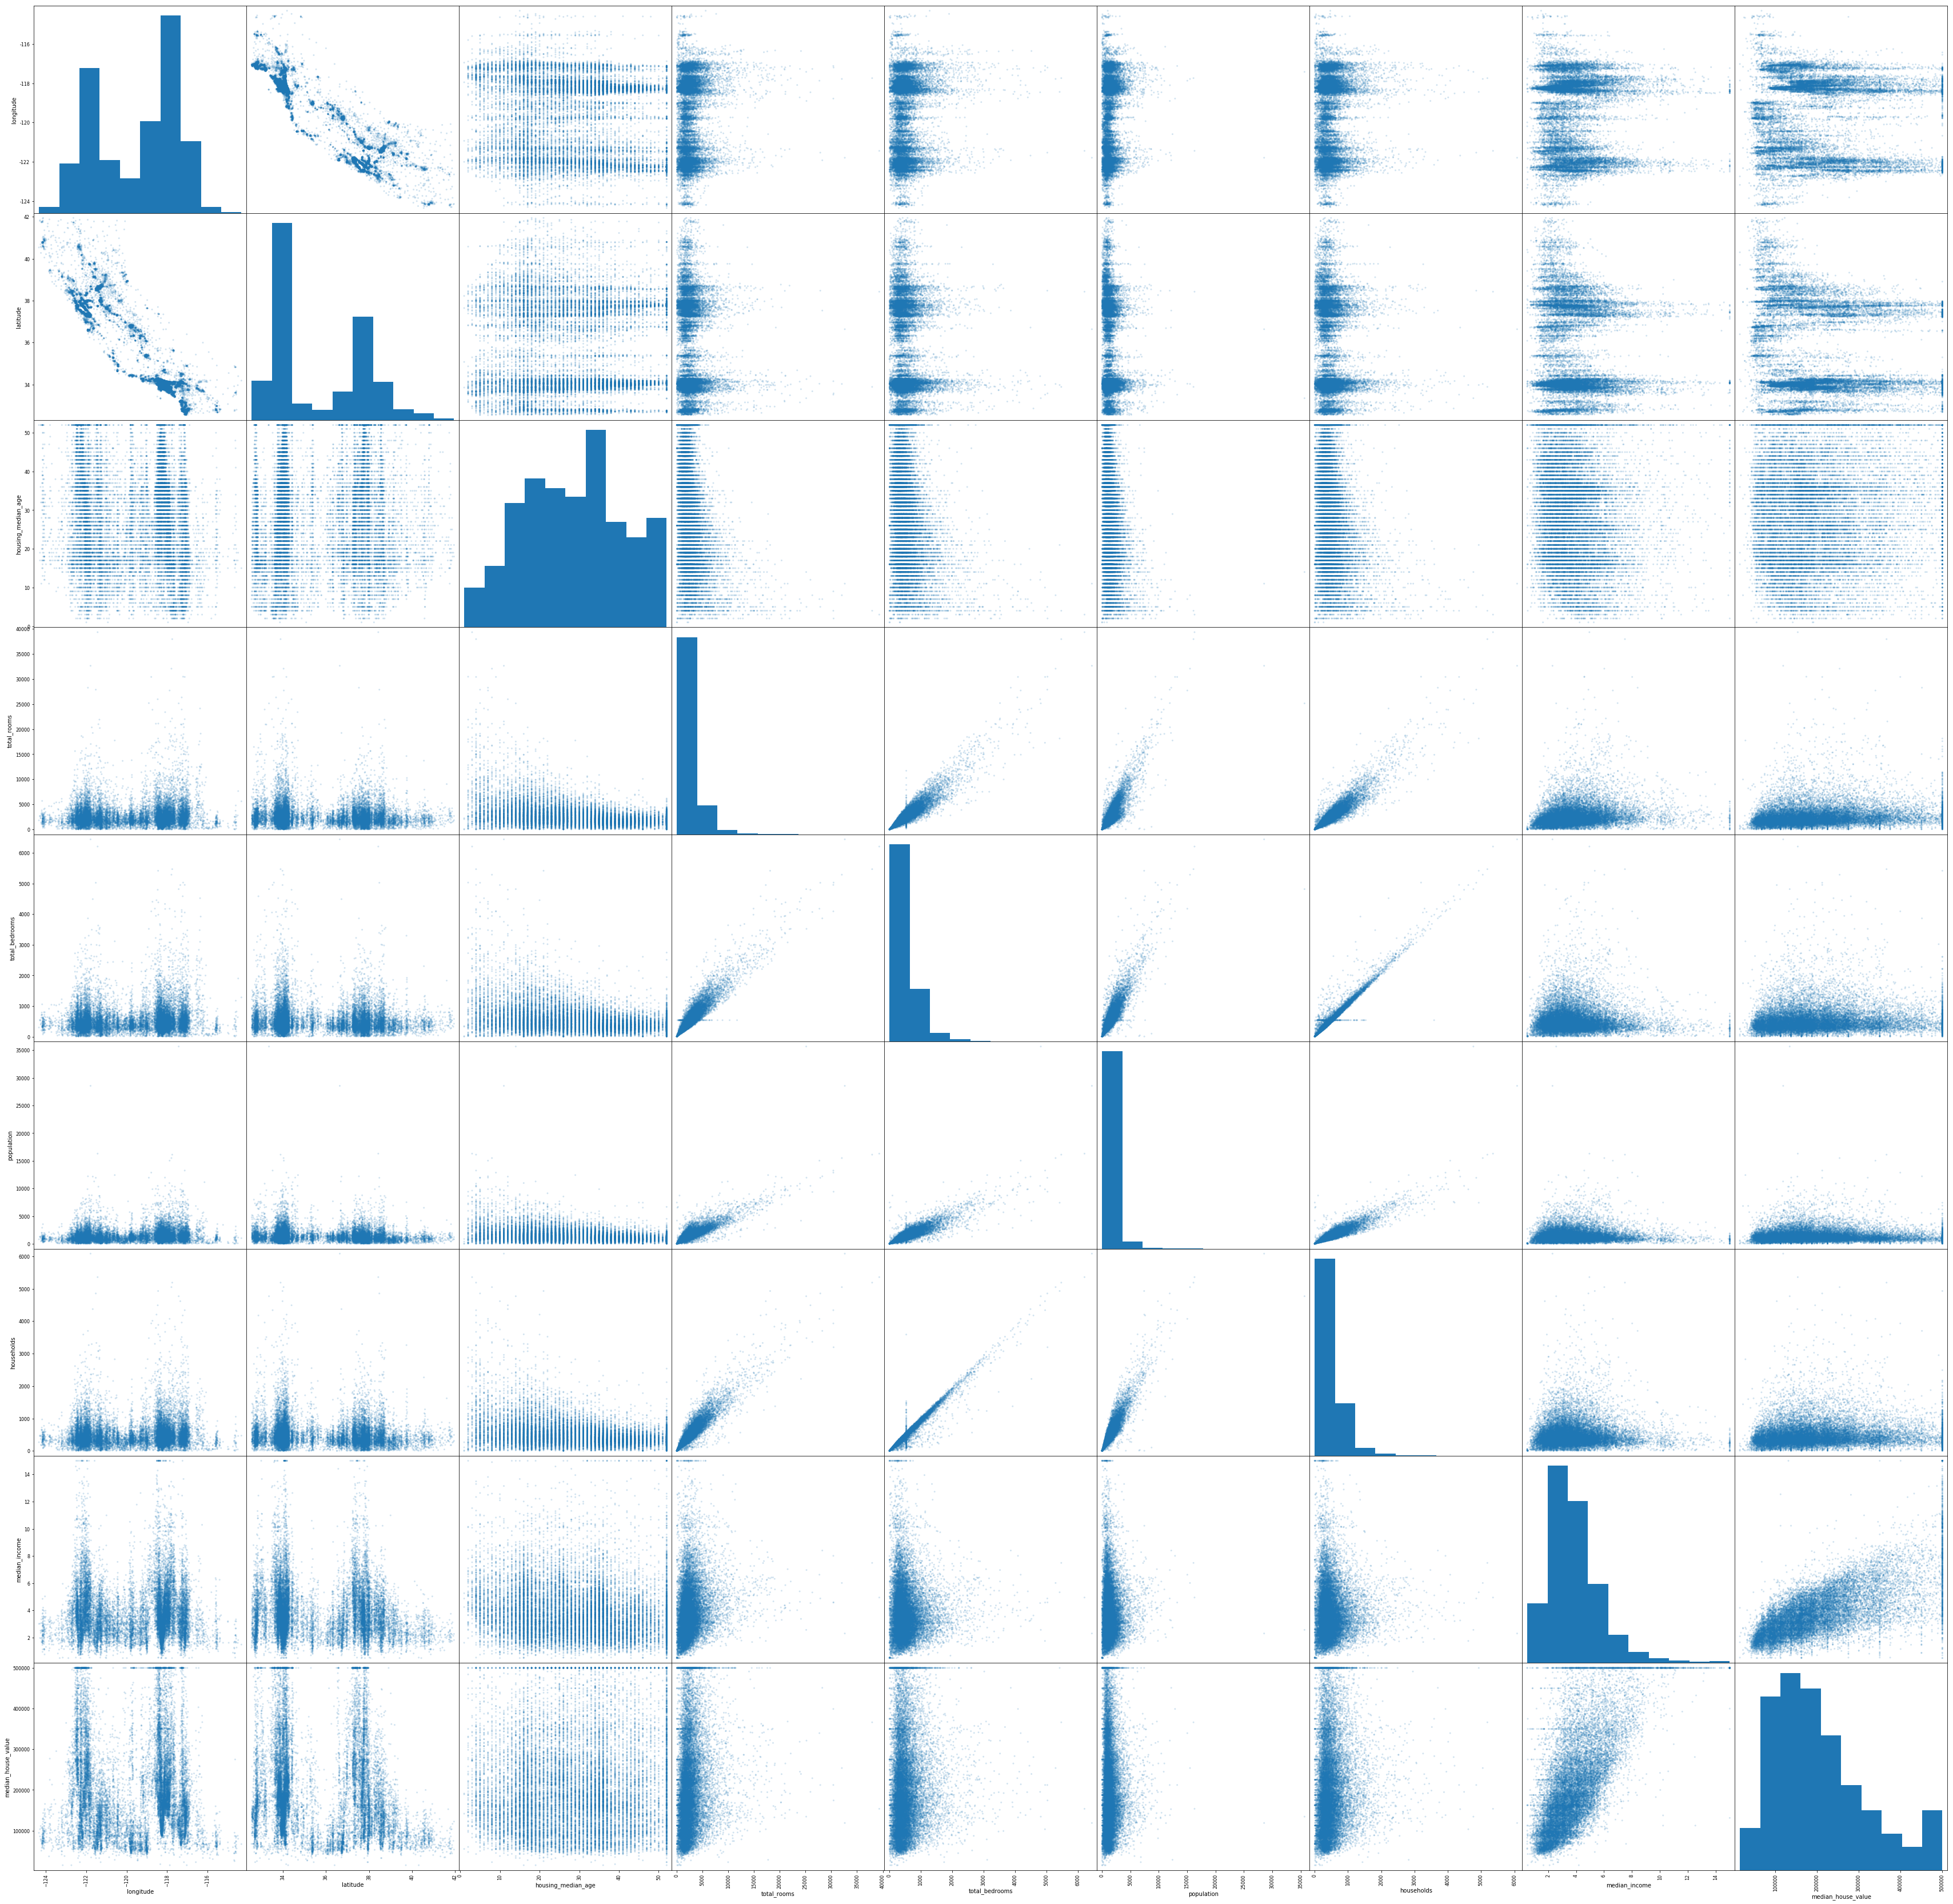

In [30]:
Axes = scatter_matrix(data_new.iloc[:,0:9], alpha=0.2, figsize=(60, 60), diagonal='hist')

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 5) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 3) for item in Axes.ravel()]

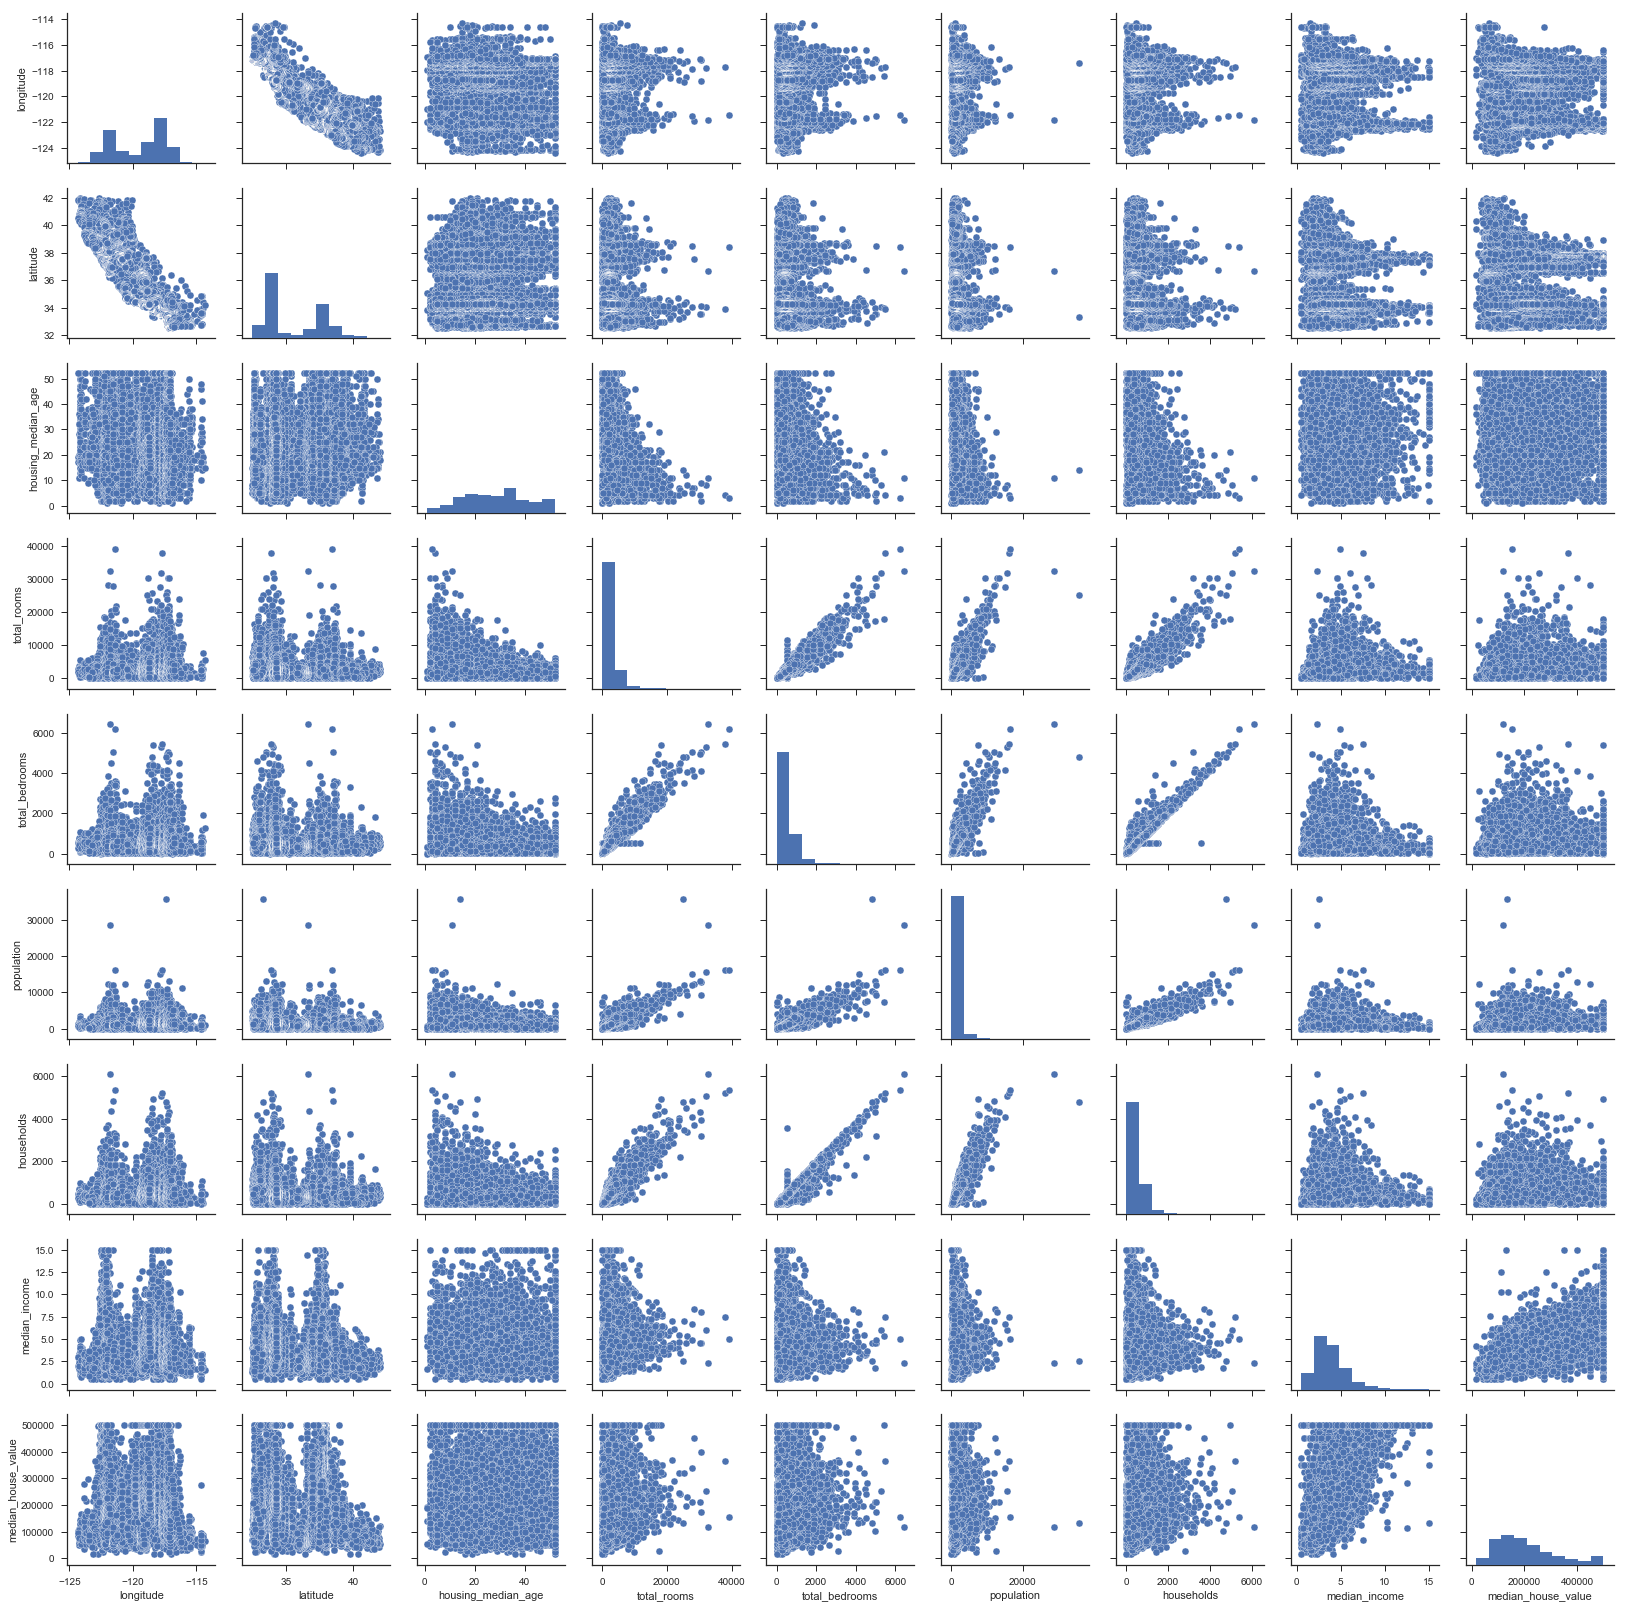

In [50]:
import seaborn as sns
sns.set(style="ticks")
test = data_new.iloc[:,[0,1,2,3,4,5,6,7,8]]
sns.pairplot(test)

In [94]:
##todo: look for outliers before!!

scaler = preprocessing.StandardScaler()
prepdata_df = data_new.copy()
#dfTest[['A', 'B']] = scaler.fit_transform(dfTest[['A', 'B']])
prepdata_df.iloc[:,0:8] = scaler.fit_transform(prepdata_df.iloc[:,0:8])
prepdata_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3  -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4  -1.337818  1.038503            1.856182    -0.462404       -0.615066   

   population  households  median_income  median_house_value  <1H OCEAN  \
0   -0.974429   -0.977033       2.344766              452600        0.0   
1    0.861439    1.669961       2.332238              358500        0.0   
2   -0.820777   -0.843637       1.782699              352100        0.0   
3   -0.766028   -0.733781       0.932968              341300        0.0   
4   -0.759847   -0.629157      -0.012881              342200        0.0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0     0.0     0.0       1.0         0.0  
1     0.0     0.0       1.0         0.0  
2     0.0     0.0       1.0         0.0  
3     0.0     0.0       1.0         0.0  
4     0.0     0.0       1.0         0.0